# Causal impact

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving tiempo_diario.csv to tiempo_diario.csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Buenos_Aires_NO2trop_diario_imputado.csv to Buenos_Aires_NO2trop_diario_imputado.csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving vehiculos_media.csv to vehiculos_media.csv


Install

In [ ]:
!pip install tfcausalimpact

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 8.1 MB/s 
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.16.0
    Uninstalling tensorflow-probability-0.16.0:
      Successfully uninstalled tensorflow-probability-0.16.0


Import

In [ ]:
import pandas as pd
from causalimpact import CausalImpact
import numpy as np
import matplotlib.pyplot as plt
import datetime

Levantamos los dataset

In [ ]:
data_no2 = pd.read_csv('Buenos_Aires_NO2trop_diario_imputado.csv')
data_no2

,Fecha_datetime,Year,Month,Day,NO2_trop_mean,NO2_trop_std,WeekofYear,NO2_trop_mean_complete,NO2_trop_std_complete
0,2018-07-08T00:00:00Z,2018,7,8,0.000051,0.000025,2018W27,5.057736e-05,0.000025
1,2018-07-09T00:00:00Z,2018,7,9,NaN,NaN,2018W28,6.446999e-07,0.000019
2,2018-07-10T00:00:00Z,2018,7,10,NaN,NaN,2018W28,2.820386e-05,0.000013
3,2018-07-11T00:00:00Z,2018,7,11,0.000095,0.000010,2018W28,9.506284e-05,0.000010
4,2018-07-12T00:00:00Z,2018,7,12,0.000157,0.000016,2018W28,1.569188e-04,0.000016
...,...,...,...,...,...,...,...,...,...
868,2020-11-22T00:00:00Z,2020,11,22,0.000049,0.000022,2020W47,4.860390e-05,0.000022
869,2020-11-23T00:00:00Z,2020,11,23,0.000060,0.000026,2020W48,5.973415e-05,0.000026
870,2020-11-24T00:00:00Z,2020,11,24,NaN,NaN,2020W48,7.559890e-05,0.000027
871,2020-11-25T00:00:00Z,2020,11,25,0.000081,0.000033,2020W48,8.124556e-05,0.000033


In [ ]:
data_vehiculos = pd.read_csv('vehiculos_media.csv')
data_vehiculos

,fecha_hora,mean_pasos
0,2019-01-01,8702.750000
1,2019-01-02,15784.458333
2,2019-01-03,16453.625000
3,2019-01-04,15334.500000
4,2019-01-05,8352.208333
...,...,...
726,2020-12-27,8073.000000
727,2020-12-28,14532.166667
728,2020-12-29,15502.083333
729,2020-12-30,15758.291667


In [ ]:
data_tiempodiario = pd.read_csv('tiempo_diario.csv')
data_tiempodiario

,fecha,temperatura,pp
0,2018-01-01,22.541667,0
1,2018-01-02,25.995833,0
2,2018-01-03,26.279167,0
3,2018-01-04,29.912500,0
4,2018-01-05,22.570833,1
...,...,...,...
1242,2021-05-27,16.833333,0
1243,2021-05-28,16.470833,0
1244,2021-05-29,11.483333,0
1245,2021-05-30,10.400000,0


**MEAN_PASOS + TIEMPO DIARIO**

Mergeamos los dos df

In [ ]:
data_tiempodiario['fecha'] = pd.to_datetime(data_tiempodiario['fecha']).dt.date

In [ ]:
data_vehiculos['fecha_hora'] = pd.to_datetime(data_vehiculos['fecha_hora']).dt.date

In [ ]:
data_vehiculos.rename(columns={'fecha_hora':'fecha'},
               inplace=True)

In [ ]:
data_combinada= pd.DataFrame.merge(data_vehiculos, data_tiempodiario, how='inner', on= 'fecha')

In [ ]:
#data_combinada.set_index('fecha',inplace = True) #utilizamos fecha como índice

In [ ]:
data_combinada

,fecha,mean_pasos,temperatura,pp
0,2019-01-01,8702.750000,27.595833,1
1,2019-01-02,15784.458333,26.666667,1
2,2019-01-03,16453.625000,21.483333,0
3,2019-01-04,15334.500000,23.887500,0
4,2019-01-05,8352.208333,26.316667,0
...,...,...,...,...
726,2020-12-27,8073.000000,25.545833,0
727,2020-12-28,14532.166667,27.220833,0
728,2020-12-29,15502.083333,27.654167,1
729,2020-12-30,15758.291667,23.800000,1


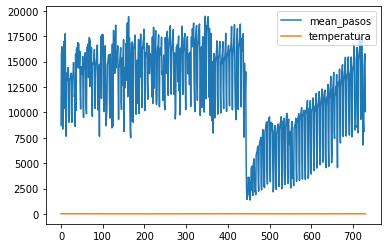

In [ ]:
plt.figure()
plt.plot(data_combinada["mean_pasos"], label = "mean_pasos")
plt.plot(data_combinada["temperatura"], label = "temperatura")
plt.legend()
plt.show()

Estandarizamos los datos

In [ ]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(data_combinada[['mean_pasos', 'temperatura']])
df_mean_norm

,mean_pasos,temperatura
0,-0.809019,1.624084
1,0.832181,1.457194
2,0.987261,0.526200
3,0.727902,0.958019
4,-0.890258,1.394329
...,...,...
726,-0.954965,1.255878
727,0.541960,1.556729
728,0.766740,1.634562
729,0.826117,0.942303


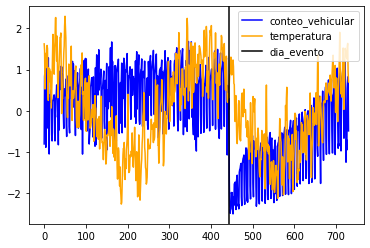

In [ ]:
plt.figure()
plt.plot(df_mean_norm["mean_pasos"], color= "blue", label = "conteo_vehicular")
plt.plot(df_mean_norm["temperatura"], color= "orange", label = "temperatura")
plt.axvline(x=444, color='k', label = "dia_evento")
plt.legend()
plt.show()

Para que no haya errores de indexación en CI:

In [ ]:
lista1= []
lista2= []
df= pd.DataFrame()

for i in df_mean_norm['mean_pasos']:
  lista1.append(i)

for j in df_mean_norm['temperatura']:
  lista2.append(j)

In [ ]:
data = pd.DataFrame()
data["mean_pasos"] = df.append(lista1)
data["temperatura"] = df.append(lista2)
print(data.shape)
data

(731, 2)


,mean_pasos,temperatura
0,-0.809019,1.624084
1,0.832181,1.457194
2,0.987261,0.526200
3,0.727902,0.958019
4,-0.890258,1.394329
...,...,...
726,-0.954965,1.255878
727,0.541960,1.556729
728,0.766740,1.634562
729,0.826117,0.942303


Períodos

In [ ]:
data_combinada.iloc[[444], data_combinada.columns.get_indexer(["fecha"])]

,fecha
444,2020-03-20


In [ ]:
event_day = 444 #447 #dia 20-03-2020 # 3 dias despues

In [ ]:
pre_period = [0, event_day -1]
post_period = [event_day,  730]

Resultados Causal analysis

In [ ]:
ci = CausalImpact(data, pre_period, post_period)

In [ ]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    -0.82              -234.17
Prediction (s.d.)         0.59 (0.1)         170.02 (28.95)
95% CI                    [0.4, 0.79]        [114.1, 227.6]

Absolute effect (s.d.)    -1.41 (0.1)        -404.19 (28.95)
95% CI                    [-1.61, -1.21]     [-461.76, -348.26]

Relative effect (s.d.)    -237.73% (17.03%)  -237.73% (17.03%)
95% CI                    [-271.6%, -204.84%][-271.6%, -204.84%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [ ]:
print(ci.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. -0.82. By contrast, in the absence of an
intervention, we would have expected an average response of 0.59.
The 95% interval of this counterfactual prediction is [0.4, 0.79].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -1.41 with a 95% interval of
[-1.61, -1.21]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of -234.17.
By contrast, had the intervention not taken place, we would have expected
a sum of 170.02. The 95% interval of this prediction is [114.1, 227.6].


The above results are given in terms of absolute numbers. In relative
terms, the response variable sh

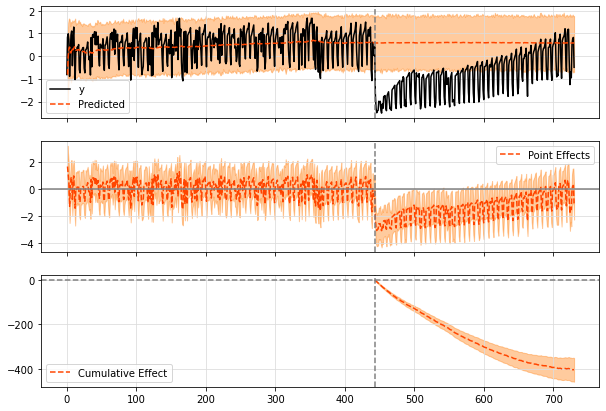

In [ ]:
ci.plot()

**NO2_MEAN Y TIEMPO DIARIO**

Merge de las 2 variables

In [ ]:
data_tiempodiario['fecha'] = pd.to_datetime(data_tiempodiario['fecha']).dt.date

In [ ]:
data_no2.rename(columns={'Fecha_datetime':'fecha'},
               inplace=True)

In [ ]:
data_no2['fecha'] = pd.to_datetime(data_no2['fecha']).dt.date

In [ ]:
data_combinada= pd.DataFrame.merge(data_no2, data_tiempodiario, how='inner', on= 'fecha')

In [ ]:
data_combinada

,fecha,Year,Month,Day,NO2_trop_mean,NO2_trop_std,WeekofYear,NO2_trop_mean_complete,NO2_trop_std_complete,temperatura,pp
0,2018-07-08,2018,7,8,0.000051,0.000025,2018W27,5.057736e-05,0.000025,10.816667,1
1,2018-07-09,2018,7,9,NaN,NaN,2018W28,6.446999e-07,0.000019,8.900000,0
2,2018-07-10,2018,7,10,NaN,NaN,2018W28,2.820386e-05,0.000013,8.233333,1
3,2018-07-11,2018,7,11,0.000095,0.000010,2018W28,9.506284e-05,0.000010,11.062500,0
4,2018-07-12,2018,7,12,0.000157,0.000016,2018W28,1.569188e-04,0.000016,12.358333,0
...,...,...,...,...,...,...,...,...,...,...,...
868,2020-11-22,2020,11,22,0.000049,0.000022,2020W47,4.860390e-05,0.000022,24.008333,0
869,2020-11-23,2020,11,23,0.000060,0.000026,2020W48,5.973415e-05,0.000026,25.412500,0
870,2020-11-24,2020,11,24,NaN,NaN,2020W48,7.559890e-05,0.000027,26.054167,1
871,2020-11-25,2020,11,25,0.000081,0.000033,2020W48,8.124556e-05,0.000033,22.970833,1


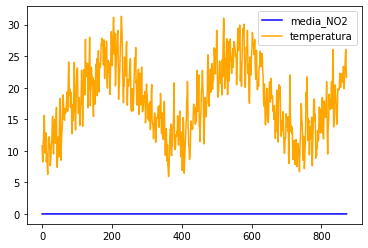

In [ ]:
plt.figure()
plt.plot(data_combinada["NO2_trop_mean_complete"],color="blue", label = "media_NO2")
plt.plot(data_combinada["temperatura"], color="orange",label = "temperatura")
plt.legend()
plt.show()

Normalización

In [ ]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(data_combinada[['NO2_trop_mean_complete', 'temperatura']])
df_mean_norm

,NO2_trop_mean_complete,temperatura
0,-0.590784,-1.324290
1,-1.277125,-1.672873
2,-0.898315,-1.794120
3,0.020684,-1.279580
4,0.870915,-1.043908
...,...,...
868,-0.617910,1.074872
869,-0.464921,1.330247
870,-0.246855,1.446947
871,-0.169239,0.886183


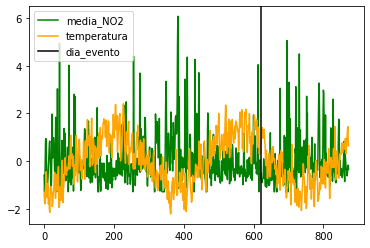

In [ ]:
plt.figure()
plt.plot(df_mean_norm["NO2_trop_mean_complete"], color= "green", label = "media_NO2")
plt.plot(df_mean_norm["temperatura"], color="orange",label = "temperatura")
plt.axvline(x=621, color='k', label = "dia_evento")
plt.legend()
plt.show()

Indexación

In [ ]:
lista1= []
lista2= []
df= pd.DataFrame()

for i in df_mean_norm['NO2_trop_mean_complete']:
  lista1.append(i)

for j in df_mean_norm['temperatura']:
  lista2.append(j)

In [ ]:
data = pd.DataFrame()
data["NO2_trop_mean_complete"] = df.append(lista1)
data["temperatura"] = df.append(lista2)
print(data.shape)
data

(873, 2)


,NO2_trop_mean_complete,temperatura
0,-0.590784,-1.324290
1,-1.277125,-1.672873
2,-0.898315,-1.794120
3,0.020684,-1.279580
4,0.870915,-1.043908
...,...,...
868,-0.617910,1.074872
869,-0.464921,1.330247
870,-0.246855,1.446947
871,-0.169239,0.886183


Períodos

In [ ]:
data_combinada.iloc[[621], data_combinada.columns.get_indexer(["fecha"])]

,fecha
700,2020-06-07


In [ ]:
event_day = 621 #dia 20-03-2020 #3 días después por la duración en ambiente y 7 días

In [ ]:
data

,NO2_trop_mean_complete,temperatura
0,-0.590784,-1.324290
1,-1.277125,-1.672873
2,-0.898315,-1.794120
3,0.020684,-1.279580
4,0.870915,-1.043908
...,...,...
868,-0.617910,1.074872
869,-0.464921,1.330247
870,-0.246855,1.446947
871,-0.169239,0.886183


In [ ]:
pre_period = [0, event_day -1]
post_period = [event_day, 700] #872

Resultados

In [ ]:
ci = CausalImpact(data, pre_period, post_period)

In [ ]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    -0.35              -28.34
Prediction (s.d.)         0.02 (0.18)        1.78 (14.47)
95% CI                    [-0.3, 0.41]       [-24.21, 32.53]

Absolute effect (s.d.)    -0.38 (0.18)       -30.11 (14.47)
95% CI                    [-0.76, -0.05]     [-60.86, -4.13]

Relative effect (s.d.)    -1693.14% (813.76%)-1693.14% (813.76%)
95% CI                    [-3422.01%, -232.12%][-3422.01%, -232.12%]

Posterior tail-area probability p: 0.01
Posterior prob. of a causal effect: 98.8%

For more details run the command: print(impact.summary('report'))


In [ ]:
print(ci.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. -0.35. By contrast, in the absence of an
intervention, we would have expected an average response of 0.02.
The 95% interval of this counterfactual prediction is [-0.3, 0.41].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -0.38 with a 95% interval of
[-0.76, -0.05]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of -28.34.
By contrast, had the intervention not taken place, we would have expected
a sum of 1.78. The 95% interval of this prediction is [-24.21, 32.53].


The above results are given in terms of absolute numbers. In relative
terms, the response variable sho

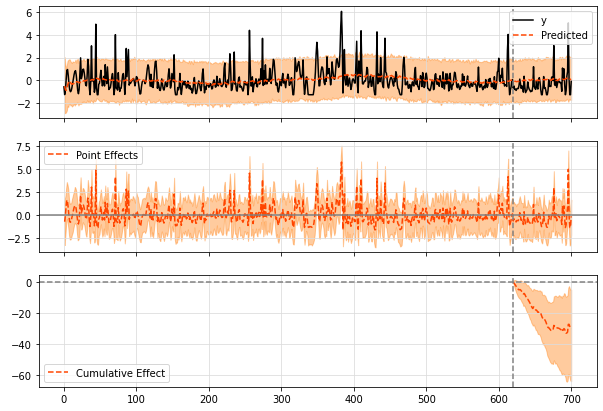

In [ ]:
ci.plot()

**3 VARIABLES**

Merge de las 3 variables

In [ ]:
data_completa= pd.DataFrame.merge(data_combinada, data_vehiculos, how='inner', on= 'fecha')

In [ ]:
data_completa

,fecha,Year,Month,Day,NO2_trop_mean,NO2_trop_std,WeekofYear,NO2_trop_mean_complete,NO2_trop_std_complete,temperatura,pp,mean_pasos
0,2019-01-01,2019,1,1,0.000010,0.000003,2019W01,0.000010,0.000003,27.595833,1,8702.750000
1,2019-01-02,2019,1,2,NaN,NaN,2019W01,0.000025,0.000004,26.666667,1,15784.458333
2,2019-01-03,2019,1,3,0.000080,0.000028,2019W01,0.000080,0.000028,21.483333,0,16453.625000
3,2019-01-04,2019,1,4,0.000111,0.000047,2019W01,0.000111,0.000047,23.887500,0,15334.500000
4,2019-01-05,2019,1,5,0.000047,0.000015,2019W01,0.000047,0.000015,26.316667,0,8352.208333
...,...,...,...,...,...,...,...,...,...,...,...,...
691,2020-11-22,2020,11,22,0.000049,0.000022,2020W47,0.000049,0.000022,24.008333,0,7779.916667
692,2020-11-23,2020,11,23,0.000060,0.000026,2020W48,0.000060,0.000026,25.412500,0,7758.083333
693,2020-11-24,2020,11,24,NaN,NaN,2020W48,0.000076,0.000027,26.054167,1,13824.458333
694,2020-11-25,2020,11,25,0.000081,0.000033,2020W48,0.000081,0.000033,22.970833,1,13912.708333


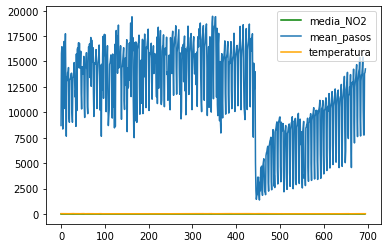

In [ ]:
plt.figure()
plt.plot(data_completa["NO2_trop_mean_complete"], color= "g", label = "media_NO2")
plt.plot(data_completa["mean_pasos"], label = "mean_pasos")
plt.plot(data_completa["temperatura"], color= "orange", label = "temperatura")
plt.legend()
plt.show()

Normalización

In [ ]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(data_completa[['NO2_trop_mean_complete', 'temperatura', 'mean_pasos']])
df_mean_norm

,NO2_trop_mean_complete,temperatura,mean_pasos
0,-1.141298,1.670314,-0.792928
1,-0.936393,1.503162,0.834368
2,-0.200409,0.570709,0.988135
3,0.220960,1.003205,0.730973
4,-0.638125,1.440199,-0.873479
...,...,...,...
691,-0.621784,1.024942,-1.004985
692,-0.470688,1.277544,-1.010002
693,-0.255320,1.392976,0.383982
694,-0.178665,0.838302,0.404261


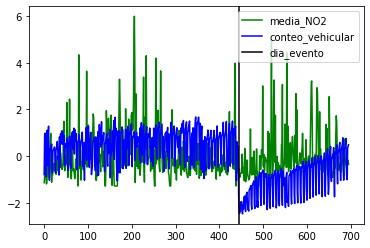

In [ ]:
plt.figure()
plt.plot(df_mean_norm["NO2_trop_mean_complete"], color="green", label = "media_NO2")
plt.plot(df_mean_norm["mean_pasos"], color="blue", label = "conteo_vehicular")
#plt.plot(df_mean_norm["temperatura"], color= "orange", label = "temperatura")
plt.axvline(x=444, color='k', label = "dia_evento")
plt.legend()
plt.show()

Indexación

In [ ]:
lista1= []
lista2= []
lista3= []
df= pd.DataFrame()

for i in df_mean_norm['NO2_trop_mean_complete']:
  lista1.append(i)

for k in df_mean_norm['mean_pasos']:
  lista2.append(k)

for j in df_mean_norm['temperatura']:
  lista3.append(j)

In [ ]:
data = pd.DataFrame()
data["NO2_trop_mean_complete"] = df.append(lista1)
data["mean_pasos"] = df.append(lista2)
data["temperatura"] = df.append(lista3)
print(data.shape)
data

(696, 3)


,NO2_trop_mean_complete,mean_pasos,temperatura
0,-1.141298,-0.792928,1.670314
1,-0.936393,0.834368,1.503162
2,-0.200409,0.988135,0.570709
3,0.220960,0.730973,1.003205
4,-0.638125,-0.873479,1.440199
...,...,...,...
691,-0.621784,-1.004985,1.024942
692,-0.470688,-1.010002,1.277544
693,-0.255320,0.383982,1.392976
694,-0.178665,0.404261,0.838302


Períodos

In [ ]:
data_completa.iloc[[444], data_completa.columns.get_indexer(["fecha"])]

,fecha
444,2020-03-20


In [ ]:
event_day= 444

In [ ]:
pre_period = [0, event_day -1]
post_period = [event_day, 695]

Resultados

In [ ]:
ci = CausalImpact(data, pre_period, post_period)

In [ ]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    -0.05              -12.37
Prediction (s.d.)         -0.17 (0.22)       -42.26 (55.61)
95% CI                    [-0.63, 0.23]      [-159.06, 58.91]

Absolute effect (s.d.)    0.12 (0.22)        29.89 (55.61)
95% CI                    [-0.28, 0.58]      [-71.28, 146.69]

Relative effect (s.d.)    -70.74% (131.58%)  -70.74% (131.58%)
95% CI                    [-347.12%, 168.67%][-347.12%, 168.67%]

Posterior tail-area probability p: 0.3
Posterior prob. of a causal effect: 69.93%

For more details run the command: print(impact.summary('report'))


In [ ]:
print(ci.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. -0.05. By contrast, in the absence of an
intervention, we would have expected an average response of -0.17.
The 95% interval of this counterfactual prediction is [-0.63, 0.23].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 0.12 with a 95% interval of
[-0.28, 0.58]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of -12.37.
By contrast, had the intervention not taken place, we would have expected
a sum of -42.26. The 95% interval of this prediction is [-159.06, 58.91].


The above results are given in terms of absolute numbers. In relative
terms, the response variable 

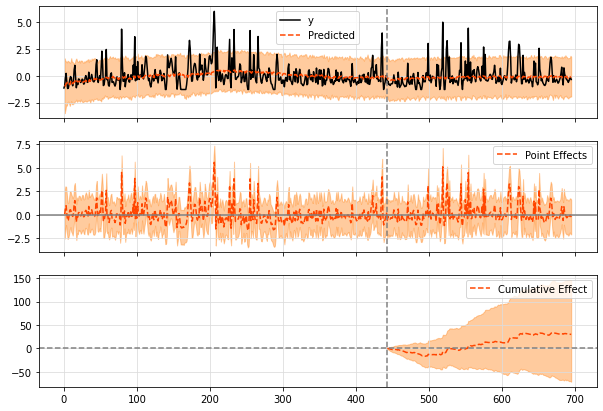

In [ ]:
ci.plot()